In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRegressor
import pickle
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_excel(r"./Data/Data.xlsx")
print(df.shape)
df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
31h 30m      1
42h 5m       1
4h 10m       1
5m           1
Name: count, Length: 368, dtype: int64

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(220)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [13]:
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,3


In [15]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [16]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df.drop(['Dep_Time'],axis=1, inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,Null,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,Null,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,Null,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,Null,13302,1,3,16,50


In [18]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(['Arrival_Time'],axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,1,3,16,50,21,35


In [20]:
import re

# Function to extract hours and minutes
def extract_time(time_str):
    hours = re.search(r'(\d+)h', time_str)
    minutes = re.search(r'(\d+)m', time_str)
    
    hours = int(hours.group(1)) if hours else 0
    minutes = int(minutes.group(1)) if minutes else 0
    
    return {'hours': hours, 'minutes': minutes}

# Apply function to the DataFrame
df[["Duration_hours", "Duration_mins"]] = df['Duration'].apply(lambda x: pd.Series(extract_time(x)))

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,1,3,16,50,21,35,4,45


In [22]:
df.drop(['Duration'],axis=1, inplace=True)

In [23]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [24]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [25]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10462 non-null  object
 1   Source          10462 non-null  object
 2   Destination     10462 non-null  object
 3   Total_Stops     10462 non-null  object
 4   Price           10462 non-null  int64 
 5   Journey_day     10462 non-null  int32 
 6   Journey_month   10462 non-null  int32 
 7   Dep_hour        10462 non-null  int32 
 8   Dep_min         10462 non-null  int32 
 9   Arrival_hour    10462 non-null  int32 
 10  Arrival_min     10462 non-null  int32 
 11  Duration_hours  10462 non-null  int64 
 12  Duration_mins   10462 non-null  int64 
dtypes: int32(6), int64(3), object(4)
memory usage: 899.1+ KB


In [27]:
columns = df.columns.tolist()

In [28]:
columns.remove('Price')

In [29]:
columns.append('Price')

In [30]:
df = df[columns]

In [31]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [32]:
df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,20,1,10,2,50,3897
1,Air India,Kolkata,Banglore,2 stops,1,5,5,50,13,15,7,25,7662
2,Jet Airways,Delhi,Cochin,2 stops,9,6,9,25,4,25,19,0,13882
3,IndiGo,Kolkata,Banglore,1 stop,12,5,18,5,23,30,5,25,6218
4,IndiGo,Banglore,New Delhi,1 stop,1,3,16,50,21,35,4,45,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,9,4,19,55,22,25,2,30,4107
10679,Air India,Kolkata,Banglore,non-stop,27,4,20,45,23,20,2,35,4145
10680,Jet Airways,Banglore,Delhi,non-stop,27,4,8,20,11,20,3,0,7229
10681,Vistara,Banglore,New Delhi,non-stop,1,3,11,30,14,10,2,40,12648


In [32]:
num_cols = [cols for cols in df.columns if df[cols].dtype != 'O']

In [33]:
categorical_features=[cols for cols in df.columns if df[cols].dtype == 'O']

In [34]:
num_cols

['Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins',
 'Price']

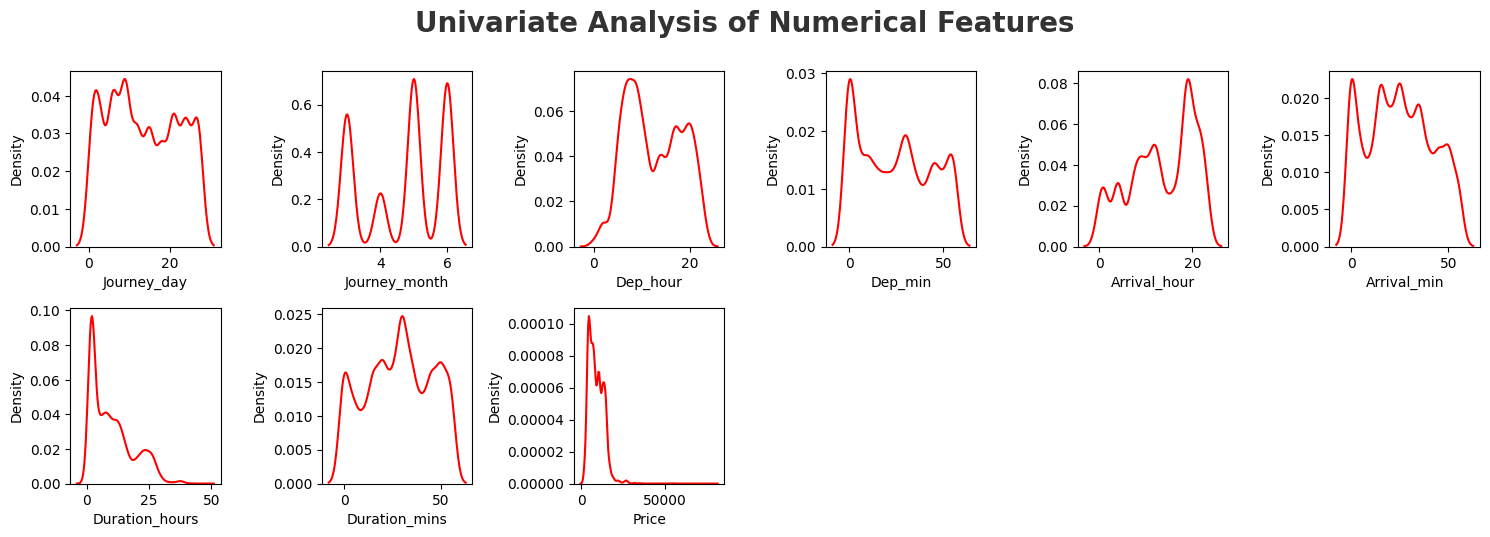

In [289]:
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

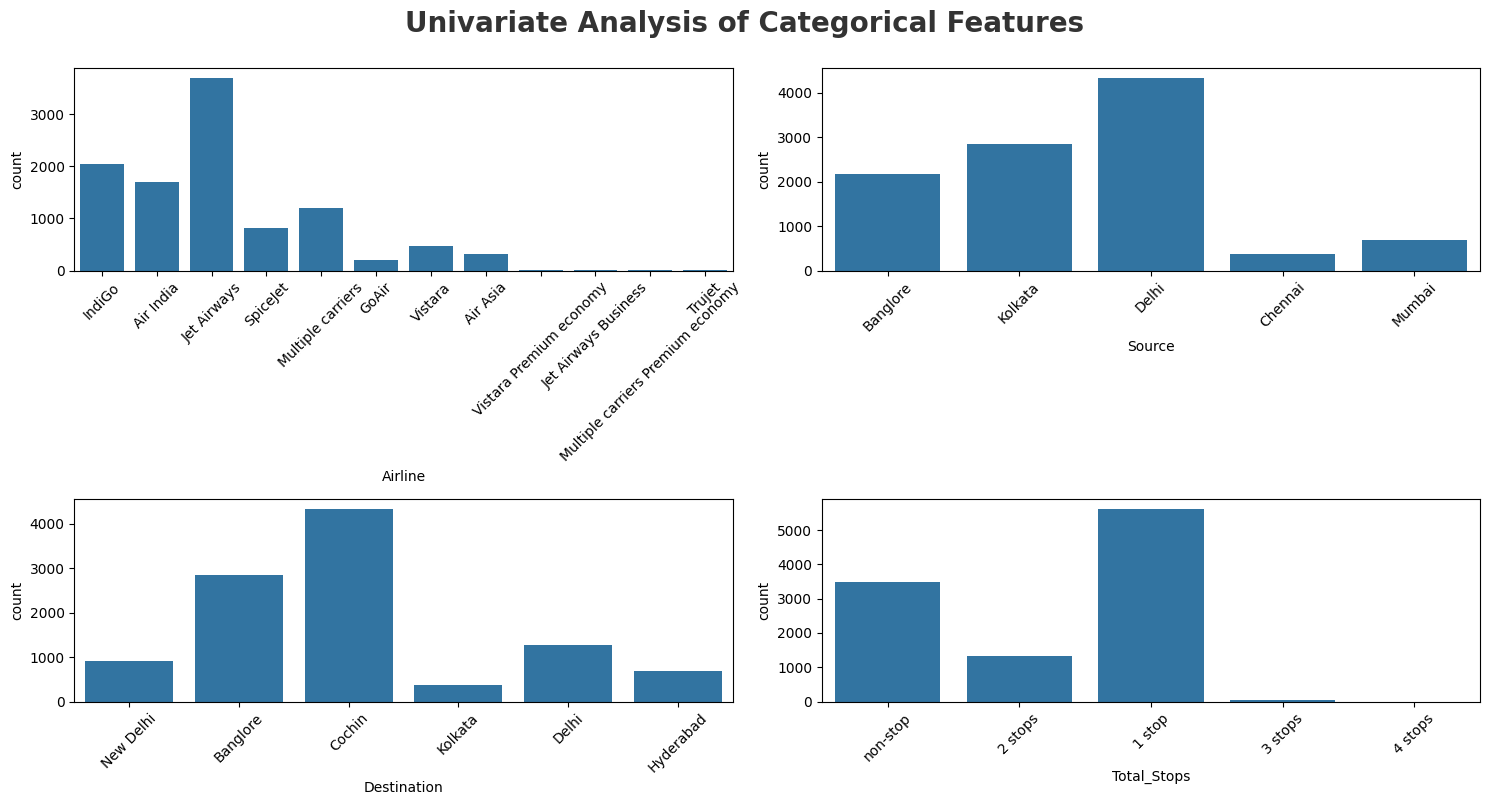

In [290]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xticks(rotation=45)
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
features = df.loc[:,categorical_features] # char Independent variable
target = df.loc[:,'Price'] # cat Dep variable
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = 'rainbow', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

ValueError: could not convert string to float: 'IndiGo'

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(provided_features, df):
    X =df[provided_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [153]:
num_cols = ['Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins']

In [154]:
compute_vif(num_cols,df)

,Variable,VIF
0,Price,1.426113
1,Journey_day,1.035664
2,Journey_month,1.044132
3,Dep_hour,1.008879
4,Dep_min,1.016815
5,Arrival_hour,1.038639
6,Arrival_min,1.069986
7,Duration_hours,1.364667
8,Duration_mins,1.066868


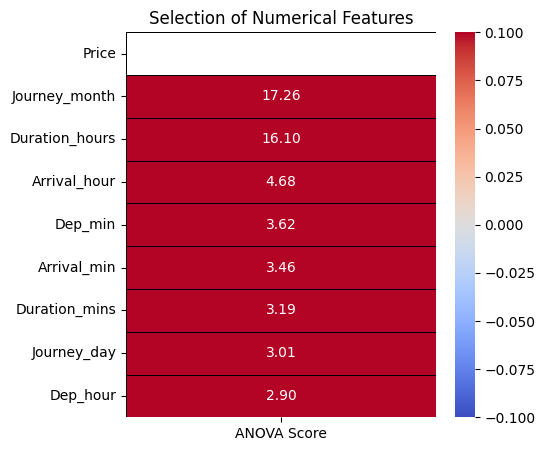

In [155]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df.loc[:,num_cols]
target = df.loc[:,'Price']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

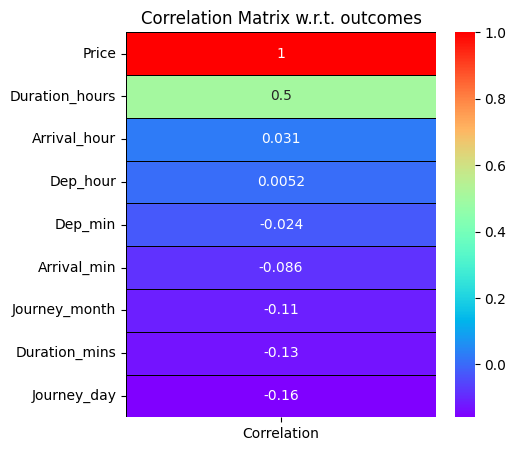

In [156]:
corr = df[num_cols].corrwith(df['Price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [157]:
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'O']

In [158]:
cat_cols = ['Total_Stops','Airline', 'Source', 'Destination']

In [159]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_cols:
    if chi2_contingency(pd.crosstab(df['Price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Total_Stops,Reject Null Hypothesis
1,Airline,Reject Null Hypothesis
2,Source,Reject Null Hypothesis
3,Destination,Reject Null Hypothesis


In [33]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [34]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict)


In [35]:
df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,1,10,2,50,3897
1,Air India,Kolkata,Banglore,2,1,5,5,50,13,15,7,25,7662
2,Jet Airways,Delhi,Cochin,2,9,6,9,25,4,25,19,0,13882
3,IndiGo,Kolkata,Banglore,1,12,5,18,5,23,30,5,25,6218
4,IndiGo,Banglore,New Delhi,1,1,3,16,50,21,35,4,45,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,9,4,19,55,22,25,2,30,4107
10679,Air India,Kolkata,Banglore,0,27,4,20,45,23,20,2,35,4145
10680,Jet Airways,Banglore,Delhi,0,27,4,8,20,11,20,3,0,7229
10681,Vistara,Banglore,New Delhi,0,1,3,11,30,14,10,2,40,12648


In [36]:
#df =  df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [37]:
df1 = df.copy()

In [1]:
#df = df1.copy()

NameError: name 'df1' is not defined

In [38]:
ohe_air = OneHotEncoder()
encoded_airline  = ohe_air.fit_transform(df[['Airline']])
encoded_airline

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10462 stored elements and shape (10462, 12)>

In [39]:
encoded_airline_df = pd.DataFrame(encoded_airline.toarray(), columns=ohe_air.get_feature_names_out(['Airline']))

In [40]:
df.reset_index(drop=True, inplace=True)
encoded_airline_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_airline_df], axis=1)

In [41]:
df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,1,10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,2,1,5,5,50,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,9,6,9,25,4,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,12,5,18,5,23,30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,1,3,16,50,21,35,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,0,9,4,19,55,22,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10458,Air India,Kolkata,Banglore,0,27,4,20,45,23,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10459,Jet Airways,Banglore,Delhi,0,27,4,8,20,11,20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10460,Vistara,Banglore,New Delhi,0,1,3,11,30,14,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:

#ohe_Airline = pd.get_dummies(df[["Airline"]], drop_first= True,dtype='int')

#ohe_Airline.head()

In [42]:
df["Source"].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [43]:
ohe_source = OneHotEncoder()
encoded_source  = ohe_source.fit_transform(df[['Source']])
encoded_source

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10462 stored elements and shape (10462, 5)>

In [44]:
encoded_source_df = pd.DataFrame(encoded_source.toarray(), columns=ohe_source.get_feature_names_out(['Source']))

In [45]:
df.reset_index(drop=True, inplace=True)
encoded_source_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_source_df], axis=1)

In [101]:
#ohe_Source = pd.get_dummies(df[["Source"]], drop_first= True,dtype='int')

#ohe_Source.head()

In [46]:
df["Destination"].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [47]:
ohe_destination = OneHotEncoder()
encoded_destination  = ohe_destination.fit_transform(df[['Destination']])
encoded_destination

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10462 stored elements and shape (10462, 6)>

In [48]:
encoded_destination_df = pd.DataFrame(encoded_destination.toarray(), columns=ohe_destination.get_feature_names_out(['Destination']))

In [49]:
df.reset_index(drop=True, inplace=True)
encoded_destination_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_destination_df], axis=1)

In [50]:
#ohe_Destination = pd.get_dummies(df[["Destination"]], drop_first = True,dtype='int')

#ohe_Destination.head()

In [51]:
#df.head()

In [52]:
#df = pd.concat([df, ohe_Airline, ohe_Source, ohe_Destination], axis = 1)

In [53]:
df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2,1,5,5,50,13,15,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,9,6,9,25,4,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,12,5,18,5,23,30,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,1,3,16,50,21,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [55]:
with open('ohe_encoder_airline.pkl','wb') as file:
    pickle.dump(ohe_air,file)

with open('ohe_encoder_source.pkl','wb') as file:
    pickle.dump(ohe_source,file)

with open('ohe_encoder_destination.pkl','wb') as file:
    pickle.dump(ohe_destination,file)

In [56]:
df.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,3897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,5,5,50,13,15,7,25,7662,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,9,6,9,25,4,25,19,0,13882,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,12,5,18,5,23,30,5,25,6218,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,3,16,50,21,35,4,45,13302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
df.shape

(10462, 33)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10462 non-null  int64  
 1   Journey_day                                10462 non-null  int32  
 2   Journey_month                              10462 non-null  int32  
 3   Dep_hour                                   10462 non-null  int32  
 4   Dep_min                                    10462 non-null  int32  
 5   Arrival_hour                               10462 non-null  int32  
 6   Arrival_min                                10462 non-null  int32  
 7   Duration_hours                             10462 non-null  int64  
 8   Duration_mins                              10462 non-null  int64  
 9   Price                                      10462 non-null  int64  
 10  Airline_Air Asia      

In [122]:
num_cols = ['Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins']

In [123]:
df.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Price', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [124]:
cat_cols = ['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(provided_features, df):
    X =df[provided_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [419]:
compute_vif(num_cols,df)

,Variable,VIF
0,Price,1.426113
1,Journey_day,1.035664
2,Journey_month,1.044132
3,Dep_hour,1.008879
4,Dep_min,1.016815
5,Arrival_hour,1.038639
6,Arrival_min,1.069986
7,Duration_hours,1.364667
8,Duration_mins,1.066868


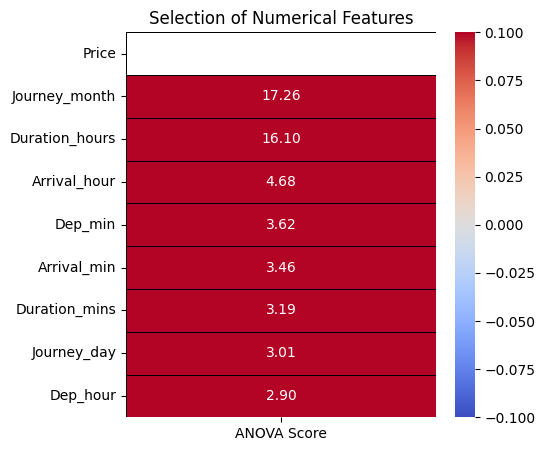

In [420]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df.loc[:,num_cols]
target = df.loc[:,'Price']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

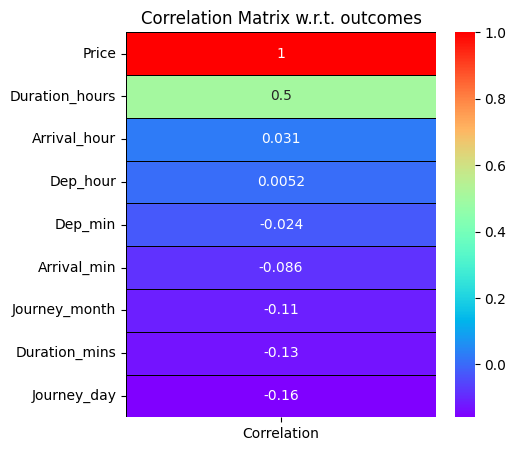

In [421]:
corr = df[num_cols].corrwith(df['Price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

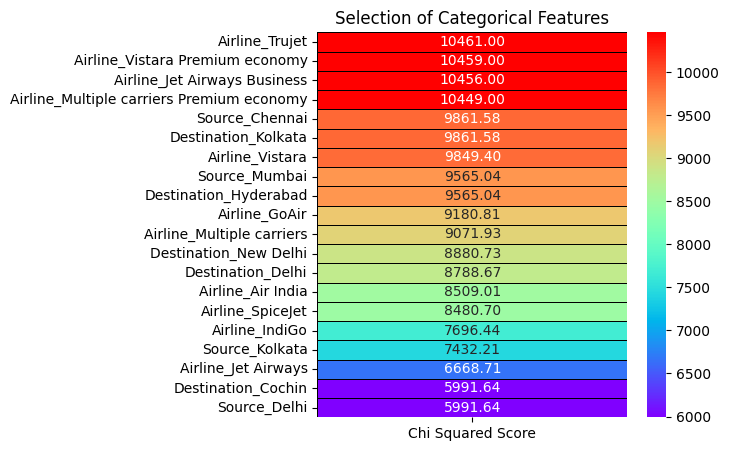

In [422]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
features = df.loc[:,cat_cols] # char Independent variable
target = df.loc[:,'Price'] # cat Dep variable
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(cat_cols),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = 'rainbow', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [423]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_cols:
    if chi2_contingency(pd.crosstab(df['Price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline_Air India,Reject Null Hypothesis
1,Airline_GoAir,Reject Null Hypothesis
2,Airline_IndiGo,Reject Null Hypothesis
3,Airline_Jet Airways,Reject Null Hypothesis
4,Airline_Jet Airways Business,Reject Null Hypothesis
5,Airline_Multiple carriers,Reject Null Hypothesis
6,Airline_Multiple carriers Premium economy,Reject Null Hypothesis
7,Airline_SpiceJet,Reject Null Hypothesis
8,Airline_Trujet,Reject Null Hypothesis
9,Airline_Vistara,Reject Null Hypothesis


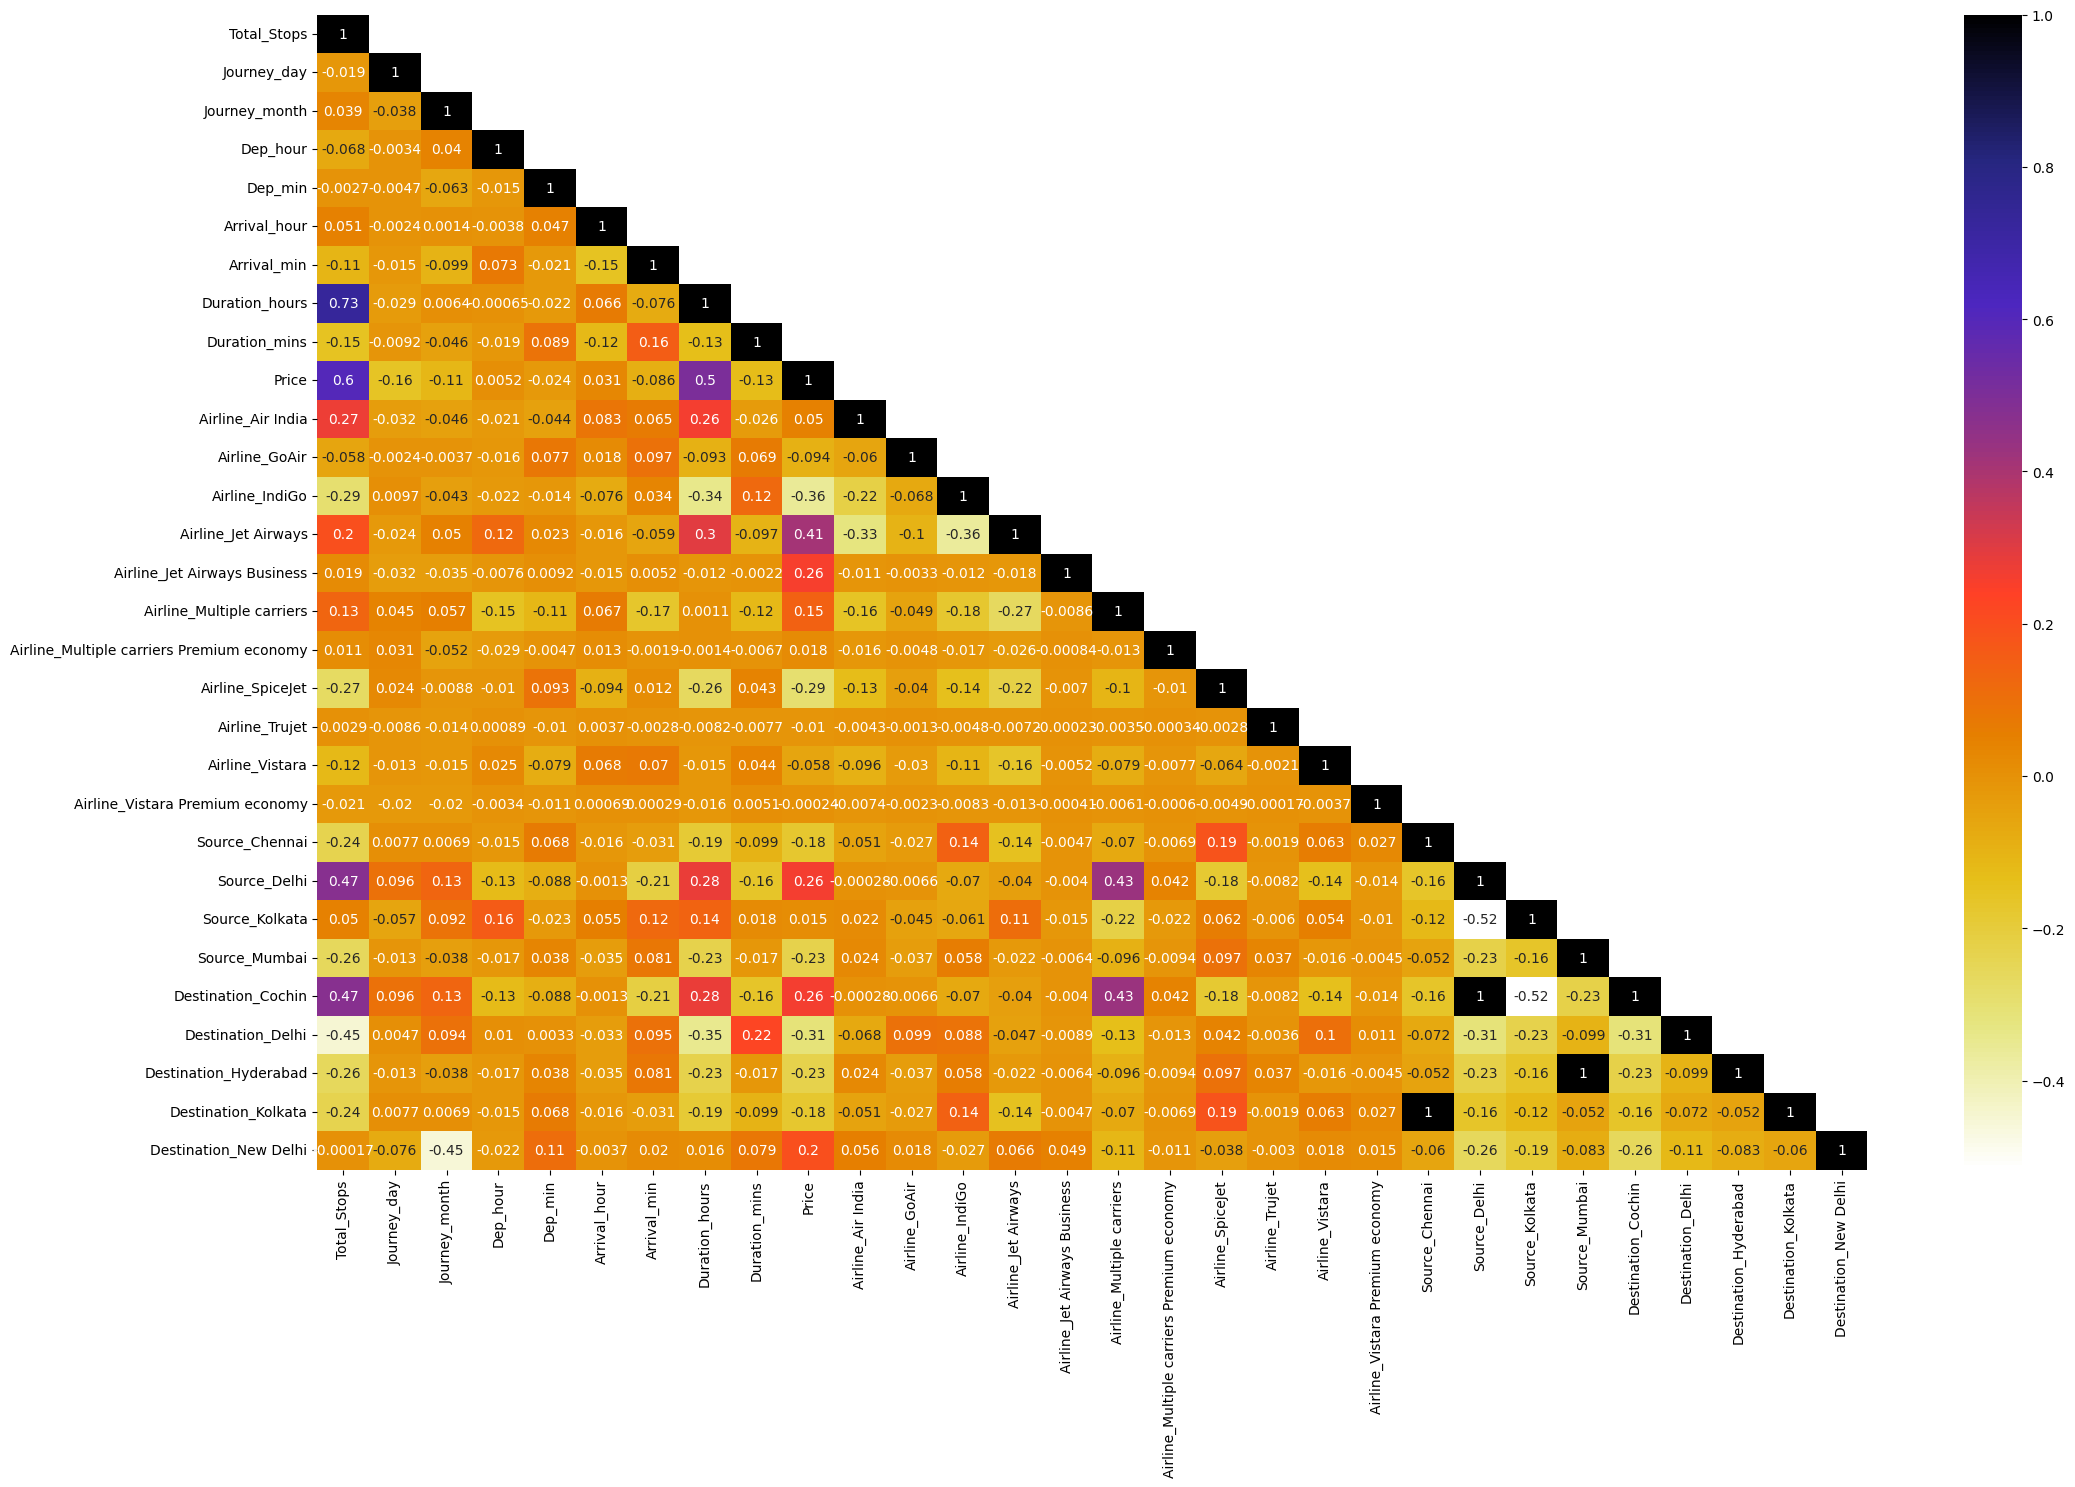

In [424]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(numeric_only=True), cmap='CMRmap_r', annot = True, mask = np.triu(df.corr(numeric_only=True), k=1))
plt.show()

In [126]:
x = df.drop(['Price'], axis=1)
y = df['Price']

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [129]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [132]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_test_linear = linear.predict(x_test)
y_pred_train_linear = linear.predict(x_train)
from sklearn import metrics
print(metrics.mean_squared_error(y_train, y_pred_train_linear))
print(metrics.mean_squared_error(y_test, y_pred_test_linear))

7915088.032502103
8677684.075956356


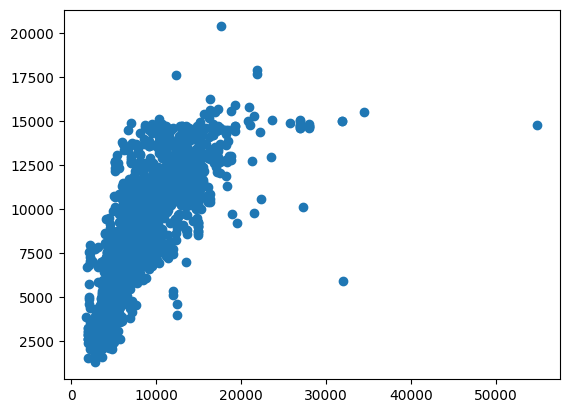

In [133]:
plt.scatter(y_test, y_pred_test_linear,)
plt.show()

In [134]:
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y_test, y_pred_test_linear))

Accuracy : 0.5838096378832243


In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor

In [136]:
models = {
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressorr":SVR(),
    "XGBRegressor":XGBRegressor(),
    #"CatBoosting Regressor":CatBoostRegressor(verbose=False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)


    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #training set
    model_train_accuracy = r2_score(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train,y_train_pred)


    #test set
    model_test_accuracy = r2_score(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9529
mse:1013031.4784
mae:576.3441
-----------------------------------
model performance for test set
Accuracy:0.8146
mse:3866307.6178
mae:1172.0018


Decision Tree
model performance for training set
Accuracy:0.9698
mse:649937.8988
mae:321.0856
-----------------------------------
model performance for test set
Accuracy:0.7080
mse:6088175.8837
mae:1379.3903


Gradient Boosting
model performance for training set
Accuracy:0.7903
mse:4513349.5071
mae:1496.4451
-----------------------------------
model performance for test set
Accuracy:0.7509
mse:5193277.5807
mae:1539.0679


AdaBoost Regressor
model performance for training set
Accuracy:0.4185
mse:12513424.8437
mae:3000.6019
-----------------------------------
model performance for test set
Accuracy:0.3334
mse:13898773.5516
mae:3072.3840




  File "c:\Users\naiko\anaconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Neighbors Regressor
model performance for training set
Accuracy:0.8413
mse:3414619.9647
mae:1132.5465
-----------------------------------
model performance for test set
Accuracy:0.7425
mse:5368277.1951
mae:1396.2464


Support Vector Regressorr
model performance for training set
Accuracy:0.0516
mse:20407468.4066
mae:3391.6973
-----------------------------------
model performance for test set
Accuracy:0.0618
mse:19560776.3868
mae:3375.0760


XGBRegressor
model performance for training set
Accuracy:0.9356
mse:1386098.1472
mae:814.1983
-----------------------------------
model performance for test set
Accuracy:0.8413
mse:3308067.6348
mae:1133.0948




In [69]:
x.shape

(10462, 29)

In [70]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {'max_depth': [5, 10, 4,6,8,15,20,25,30],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'n_estimators':[100,200,400,500,600]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300,500],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4],
                  "alpha": [0, 0.1, 1.0, 10.0],
                  "lambda": [0, 0.1, 1.0, 10.0],
                 'max_depth': [5, 10, 4,6,8,15,20,25,30]}
#cat_params = {"learning_rate": [0.1,0.01],
#             'max_depth': [5, 11, 4,6,8]}

In [71]:
randomcv_models = [('KNN',KNeighborsRegressor(), knn_params),
                  ('RF',RandomForestRegressor(), rf_params),
                  ('XGBoost',XGBRegressor() , xgboost_params)]

In [72]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1,scoring='neg_mean_squared_error')
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 3, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'friedman_mse'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'lambda': 1.0, 'colsample_bytree': 0.8, 'alpha': 0.1}


In [73]:
models = {
    "Random Forest":RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 15, criterion = 'friedman_mse'),
    "K-Neighbors Classifier":KNeighborsRegressor( n_neighbors = 3, metric = 'manhattan'),
    "XGBClassifier":XGBRegressor( n_estimators = 500,max_depth =  10, learning_rate = 0.01, colsample_bytree = 0.8,lambda_=1.0,alpha = 0.1)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)


    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #training set
    model_train_accuracy = r2_score(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train,y_train_pred)


    #test set
    model_test_accuracy = r2_score(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9215
mse:1688415.8005
mae:890.2754
-----------------------------------
model performance for test set
Accuracy:0.8067
mse:4031293.6254
mae:1279.4366


K-Neighbors Classifier
model performance for training set
Accuracy:0.8774
mse:2638004.9074
mae:955.6426
-----------------------------------
model performance for test set
Accuracy:0.7072
mse:6104695.1124
mae:1406.7853


XGBClassifier
model performance for training set
Accuracy:0.9358
mse:1380528.9239
mae:807.2113
-----------------------------------
model performance for test set
Accuracy:0.8393
mse:3350751.4355
mae:1133.7081




In [137]:
xgb = XGBRegressor( n_estimators = 500,max_depth =  10, learning_rate = 0.01, colsample_bytree = 0.8,lambda_=1.0,alpha = 0.1)

In [138]:
xgb.fit(x_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_=1.0, learning_rate=0.01,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, ...)

In [139]:
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

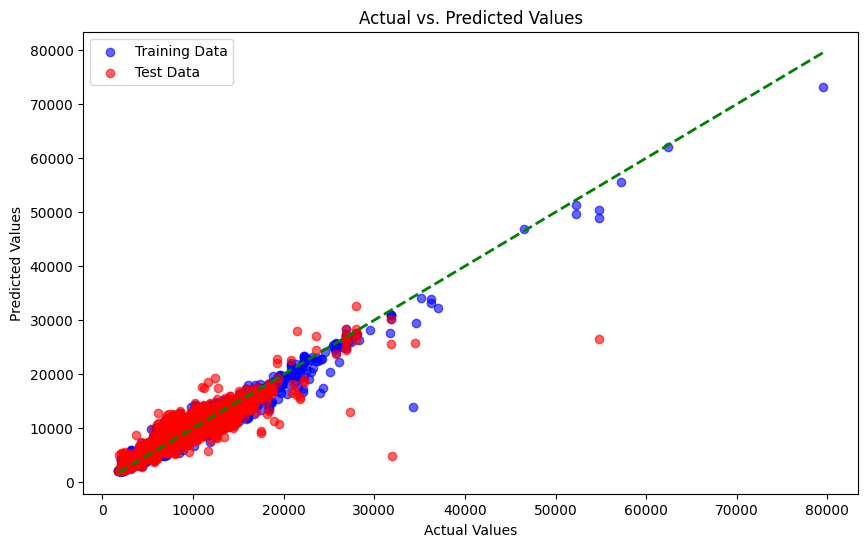

In [140]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_train_pred_xgb, color='blue', alpha=0.6, label='Training Data')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_xgb, color='red', alpha=0.6, label='Test Data')

# Add line of equality
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

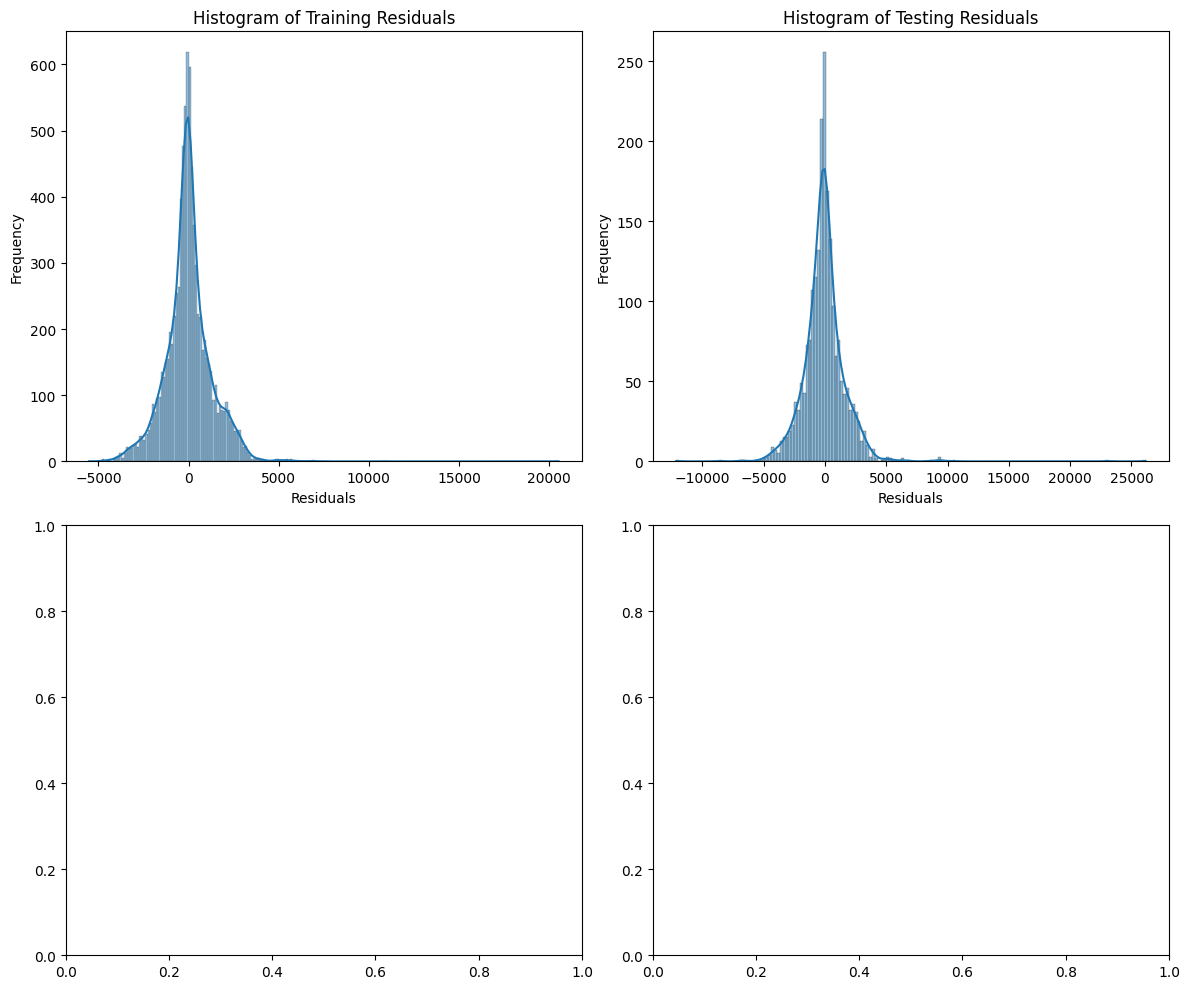

In [89]:
train_residuals = y_train - y_train_pred_xgb
test_residuals = y_test - y_test_pred_xgb

# Plot histogram and Q-Q plot for training residuals
fig, axes = plt.subplots(2,2, figsize=(12, 10))

# Histogram for training residuals
sns.histplot(train_residuals, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Training Residuals')
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')


# Histogram for testing residuals
sns.histplot(test_residuals, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Testing Residuals')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

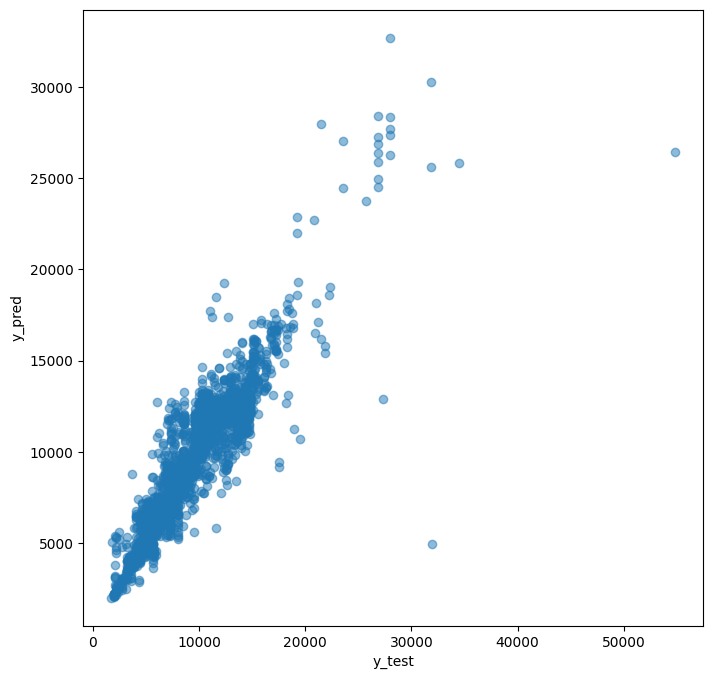

In [141]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_test_pred_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [142]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgb)))

MAE: 1124.8984541804155
MSE: 3314328.4850795222
RMSE: 1820.52972650257


In [143]:
r2_score(y_test, y_test_pred_xgb)

0.8410415053367615

In [144]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)

In [145]:
print('training_accuracy for all 10 indivisual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 indivisual : [0.86265886 0.81526142 0.85742146 0.82604849 0.88886774 0.848912
 0.83173633 0.83438897 0.79028088 0.86526191]

training_accuracy with mean value : 0.8420838057994843

training_accuracy max value : 0.8888677358627319


In [146]:
import pickle 
pickle.dump(xgb, open('Flight_price_pred.pkl', 'wb'))

In [84]:
model = open('Flight_price_pred.pkl','rb')
forest = pickle.load(model)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [162]:
trf4 = XGBRegressor()

In [163]:
pipe = Pipeline([
    ('trf1'),
    ('trf2'),
    ('trf3'),
    ('trf4')
])

In [167]:
pipe.fit(x_train,y_train)

ValueError: too many values to unpack (expected 2)